In [35]:
import geopandas as gpd
import fiona
import contextily as ctx
import geopandas as gpd
import pandas as pd
from shapely import geometry
import matplotlib.pyplot as plt
from wilcoxon import sheets
from tqdm import tqdm

In [12]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
cadastral = gpd.read_file('Documents/Geospatial/GEOSPATIAL/sla-cadastral-land-parcel/sla-cadastral-land-parcel-kml.kml', driver='KML')
malls = sheets.getGeo("Malls Alternative")

In [21]:
cadastral["Area"] = cadastral.geometry.to_crs('EPSG:2154').area
malls = gpd.GeoDataFrame(malls, geometry=gpd.points_from_xy(malls.Longitude, malls.Latitude))

In [48]:
cadastrald = cadastral.values.tolist()

def lotArea(x):
    area = 0
    distance = 100000
    for k, desc, geo, a in tqdm(cadastrald):
        if x.within(geo):
            area = a
            distance = 0
            lot = geo
        else:
            try:
                dist = geo.exterior.distance(x)
                if dist < distance:
                    distance = dist
                    area = a
                    lot = geo
            except Exception:
                for g in geo:
                    dist = g.exterior.distance(x)
                    if dist < distance:
                        distance = dist
                        area = a
                        lot = geo
    return area, distance, lot

In [49]:
lotArea = malls.geometry.apply(lotArea)

100%|██████████| 145889/145889 [00:02<00:00, 51270.22it/s]


In [53]:
malls['lotArea'] = lotArea.apply(lambda x: x[0])
malls['dLot'] = lotArea.apply(lambda x: x[1])
malls['lot'] = lotArea.apply(lambda x: x[2])

<AxesSubplot:>

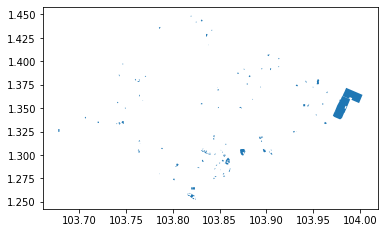

In [57]:
gpd.GeoDataFrame(malls,geometry=malls.lot).plot()

In [83]:
mel = gpd.GeoDataFrame(malls, geometry=malls.lot).set_crs("EPSG:4326")

In [89]:
mel.to_crs(epsg=3857).area.to_clipboard(index=False)